In [1]:
from utils import *
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
foo = VideoSubExtractor('out3.mp4')

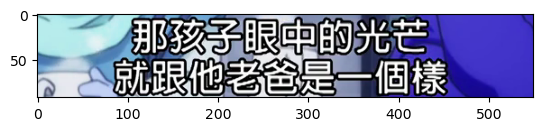

In [3]:
ret, frame = get_frame_n(foo.cap, 9120)
plt.imshow(frame)

In [4]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [7]:
from segment_anything import SamPredictor, sam_model_registry
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [9]:
predictor.set_image(frame)
masks, scores, logits = predictor.predict(multimask_output=True)

In [15]:
masks.shape
scores.shape
logits.shape
scores

(3, 92, 550)

(3,)

(3, 256, 256)

array([0.456186  , 0.42832297, 0.4236504 ], dtype=float32)

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Mask 1, Score: 0.456')

(-0.5, 549.5, 91.5, -0.5)

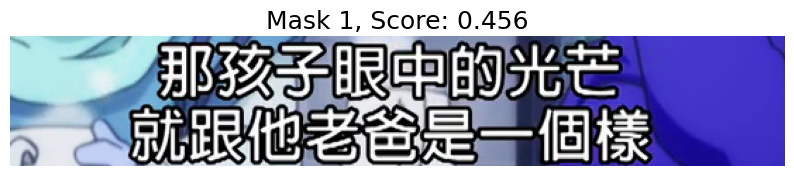

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Mask 2, Score: 0.428')

(-0.5, 549.5, 91.5, -0.5)

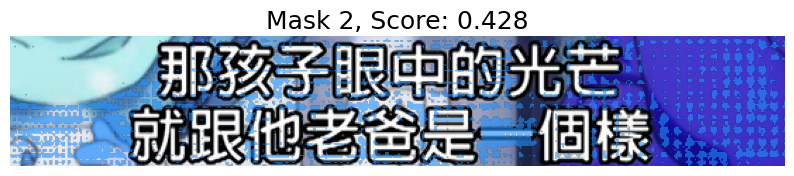

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Mask 3, Score: 0.424')

(-0.5, 549.5, 91.5, -0.5)

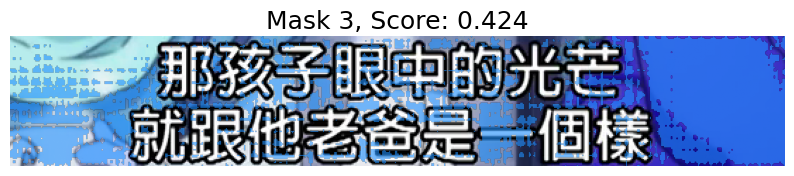

In [16]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(frame)
    show_mask(mask, plt.gca())
    # show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

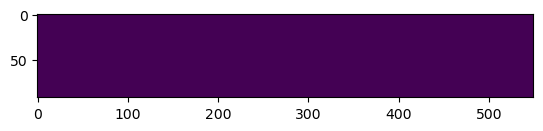

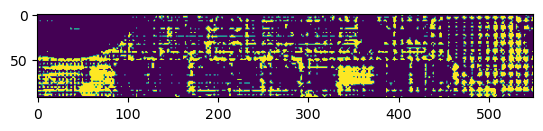

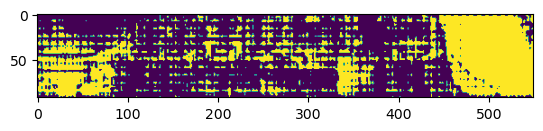

In [21]:
for mask in masks:
    plt.figure()
    plt.imshow(mask)

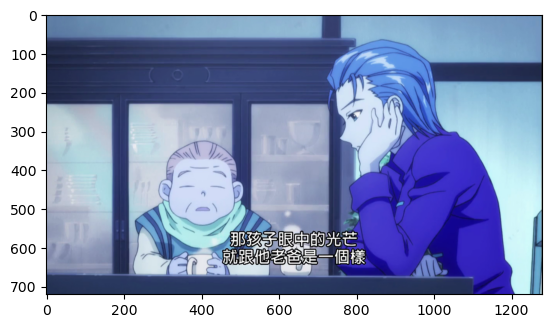

In [25]:
foo2 = VideoSubExtractor('LR_Chinese_001_720P[52KHD].mp4')

ret, frame = get_frame_n(foo2.cap, 9120)
plt.imshow(frame)

In [26]:
predictor.set_image(frame)


In [30]:
masks, scores, logits = predictor.predict(multimask_output=False)
masks.shape

(1, 720, 1280)

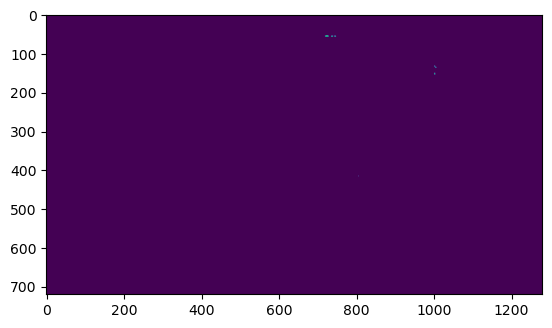

In [31]:
plt.imshow(masks[0])

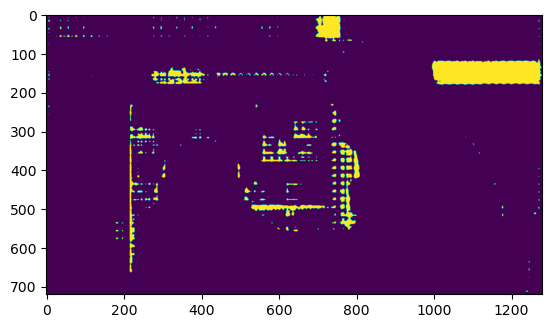

In [29]:
plt.imshow(masks[1])

In [32]:
from segment_anything import SamAutomaticMaskGenerator
mask_generator = SamAutomaticMaskGenerator(sam)

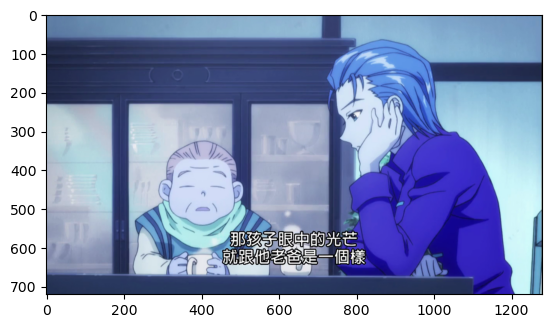

In [33]:
plt.imshow(frame)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

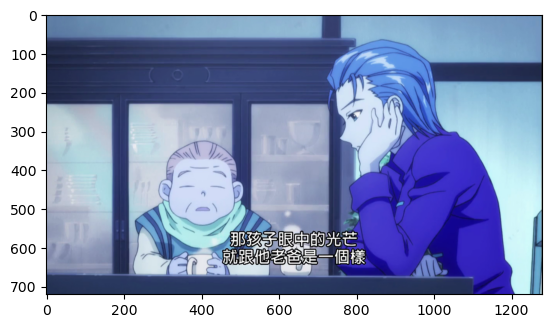

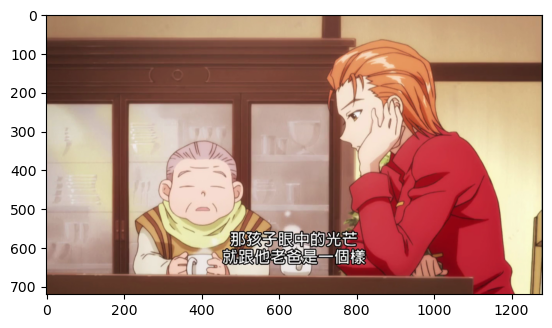

In [46]:
import cv2


# foo2.show_frame(9120)
ret, frame = get_frame_n(foo2.cap, 9120)
plt.figure()
plt.imshow(frame)
# convert to bgr
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.figure()
plt.imshow(frame)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

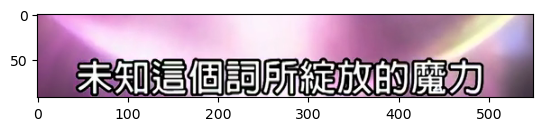

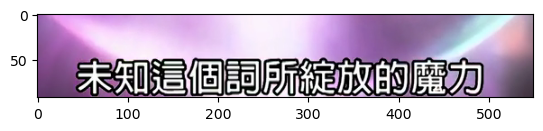

In [139]:
import cv2


# foo2.show_frame(9120)
ret, frame = get_frame_n(foo.cap, 3060)
plt.figure()
plt.imshow(frame)
# convert to bgr
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.figure()
plt.imshow(frame)

In [140]:
from segment_anything import SamAutomaticMaskGenerator
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(frame)

In [49]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

<Figure size 2000x2000 with 0 Axes>

(-0.5, 549.5, 91.5, -0.5)

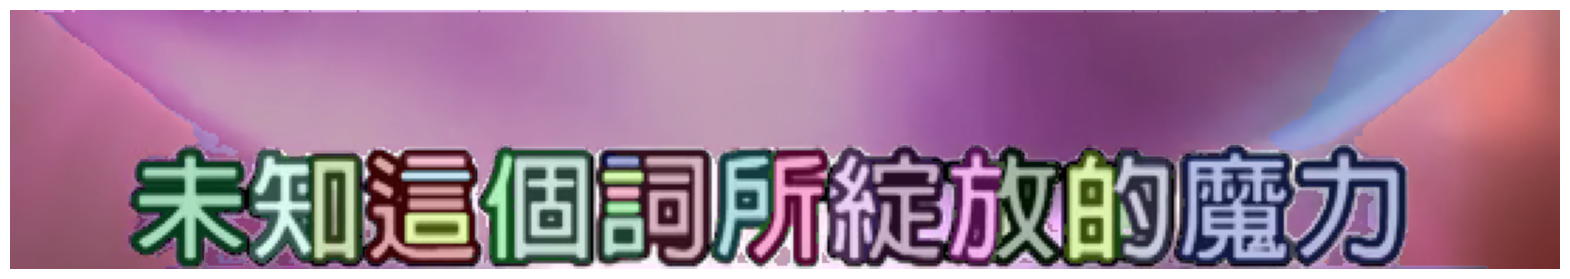

In [141]:
plt.figure(figsize=(20,20))
plt.imshow(frame)
show_anns(masks)
plt.axis('off')
plt.show() 

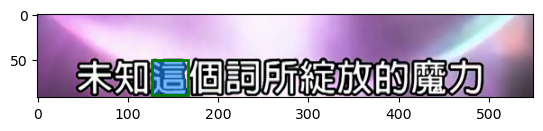

In [144]:
fig, ax = plt.subplots(1, 1)
i = 2
plt.imshow(frame)
show_mask(masks[i]['segmentation'], ax=ax)
show_box(masks[i]['bbox'], ax=ax)

In [83]:
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2], box[3]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

In [122]:
def mask_to_char(img, mask, bright_thresh=230):
    """
    Extracts the character from the image, given the mask.
    note that a valid character should have roughly a bbox of w, h = 38, 40
    problem is that sometimes only half of a two radical character is detected.

    """
    # mask is a nice output dict
    seg_mask = mask['segmentation']
    bbox = mask['bbox']
    x, y, w, h = bbox
    bbox_extract_seg_mask = seg_mask[y:y+h, x:x+w]
    bbox_extract = img[y:y+h, x:x+w]
    bbox_extract_gray = cv.cvtColor(bbox_extract, cv.COLOR_RGB2GRAY)
    img_bright = bbox_extract_gray > bright_thresh
    char_mask = img_bright & bbox_extract_seg_mask
    return char_mask  # binary mask of character

In [171]:
len(masks)

40

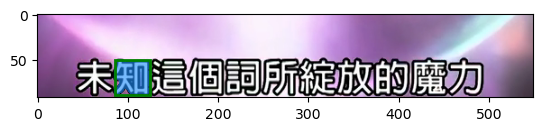

In [175]:
fig, ax = plt.subplots(1, 1)
i = 
plt.imshow(frame)
show_mask(masks[i]['segmentation'], ax=ax)
show_box(masks[i]['bbox'], ax=ax)
# x, y = masks[i]['point_coords'][0]
# ax.scatter(x, y, color='green', marker='*', s=375, edgecolor='white', linewidth=1.25)

w, h = 80, 40


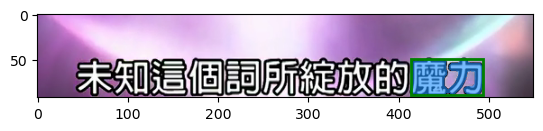

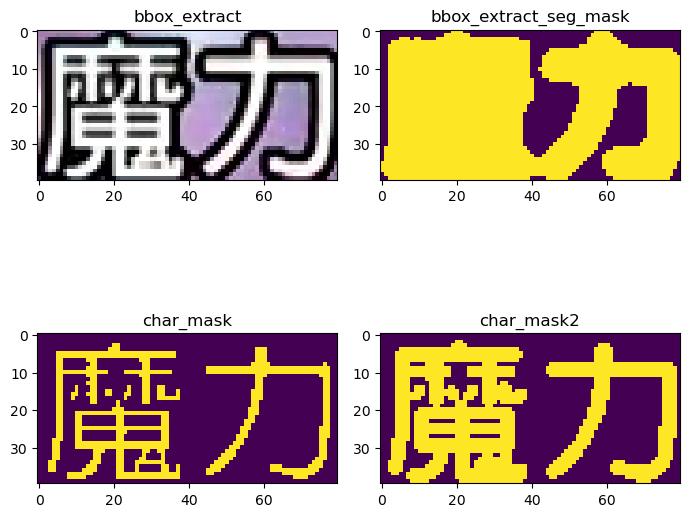

In [188]:
fig, ax = plt.subplots(1, 1)
i = 30
plt.imshow(frame)
show_mask(masks[i]['segmentation'], ax=ax)
show_box(masks[i]['bbox'], ax=ax)
# x, y = masks[i]['point_coords'][0]
# ax.scatter(x, y, color='green', marker='*', s=375, edgecolor='white', linewidth=1.25)

seg_mask = masks[i]['segmentation']
bbox = masks[i]['bbox']
x, y, w, h = bbox
print(f'w, h = {w}, {h}')
temp = np.zeros_like((h, w))
bbox_extract_seg_mask = seg_mask[y:y+h, x:x+w]

bbox_extract = frame[y:y+h, x:x+w]

char_mask = mask_to_char(frame, masks[i], 230)
char_mask2 = grow_thin_binary(char_mask)


# do the above four plots in a 2x2 grid
fig, ax = plt.subplots(2, 2, figsize=(7, 7))

_ = ax[0, 0].imshow(bbox_extract)
_ = ax[0, 0].set_title('bbox_extract')

_ = ax[0, 1].imshow(bbox_extract_seg_mask)
_ = ax[0, 1].set_title('bbox_extract_seg_mask')

_ = ax[1, 0].imshow(char_mask)
_ = ax[1, 0].set_title('char_mask')

_ = ax[1, 1].imshow(char_mask2)
_ = ax[1, 1].set_title('char_mask2')

plt.tight_layout()
plt.show()



w, h = 40, 41


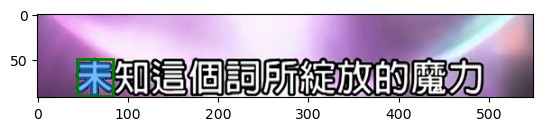

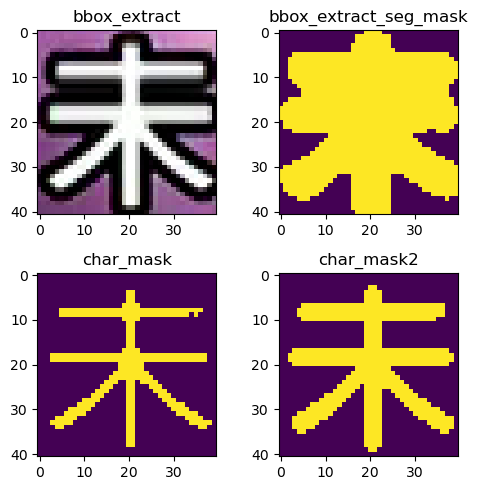

w, h = 39, 39


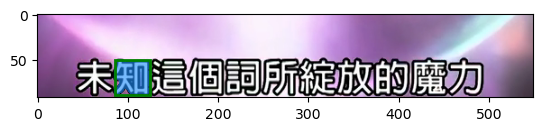

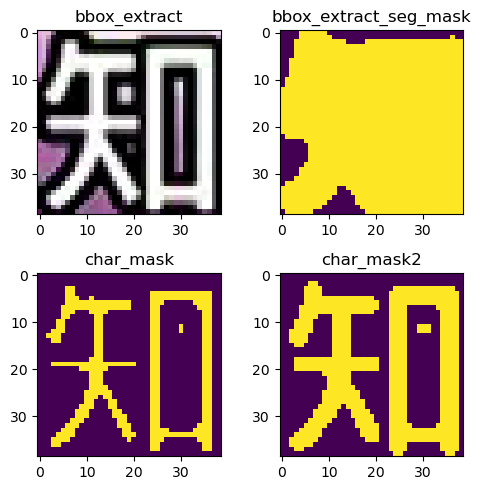

w, h = 40, 39


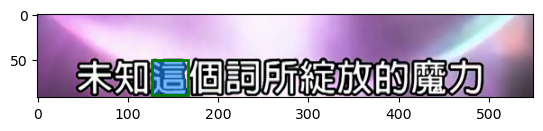

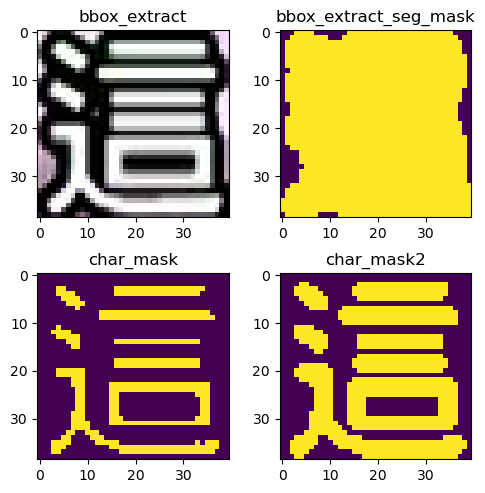

w, h = 38, 40


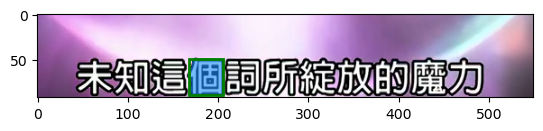

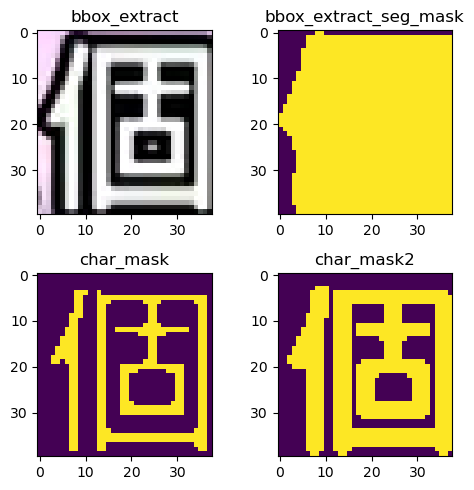

w, h = 38, 39


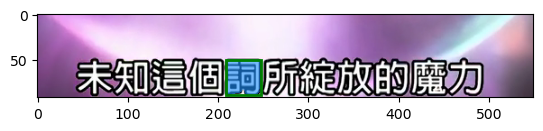

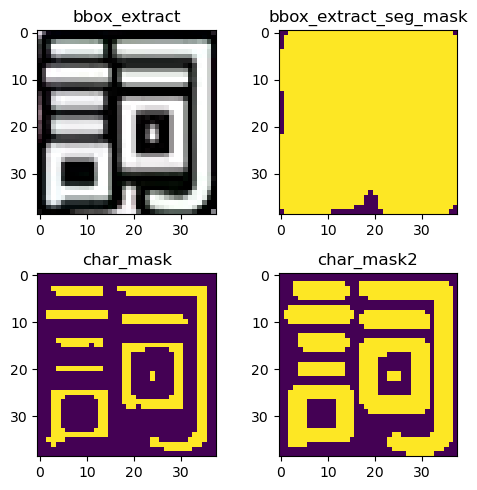

w, h = 40, 39


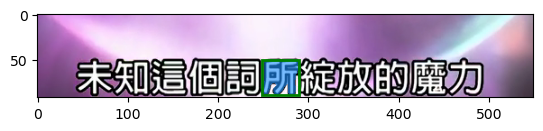

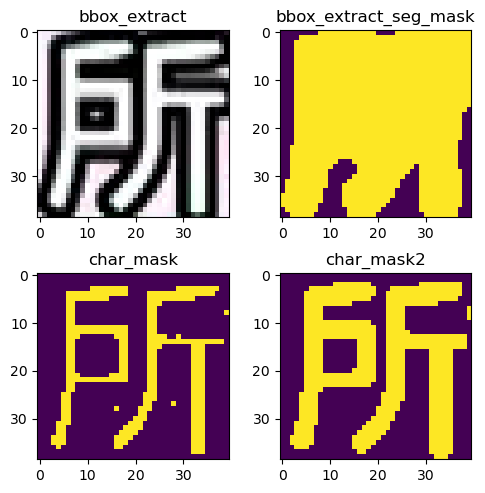

w, h = 39, 40


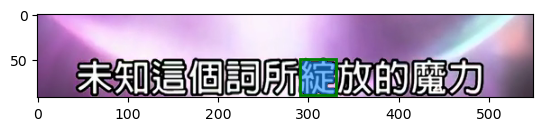

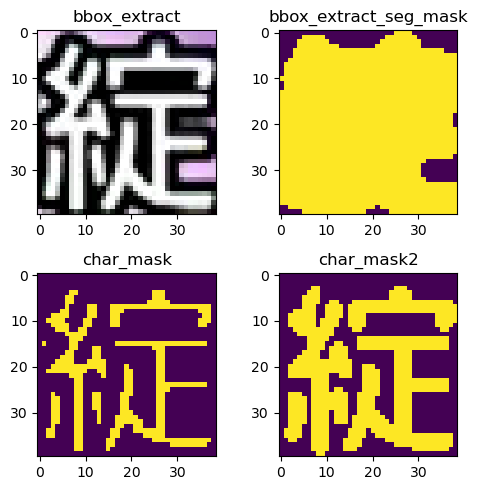

w, h = 40, 40


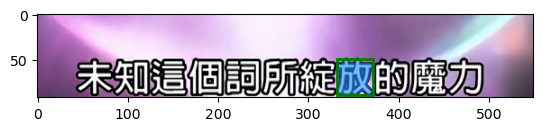

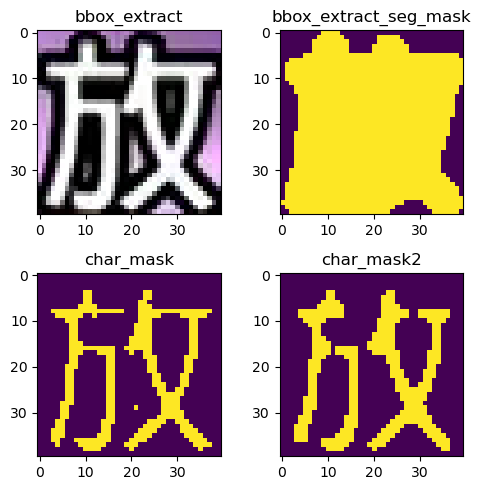

w, h = 38, 39


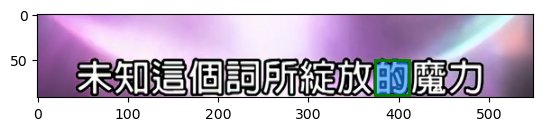

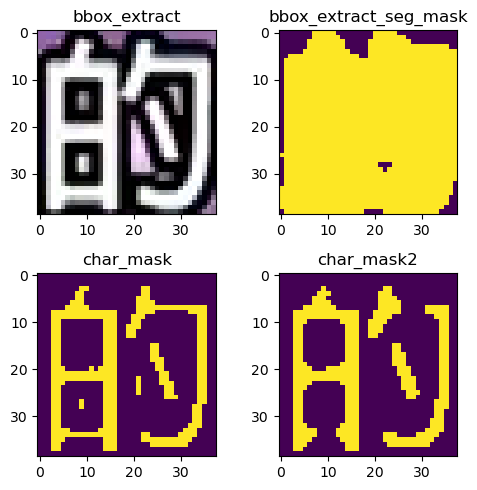

w, h = 40, 40


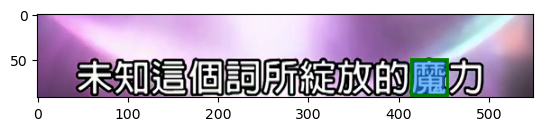

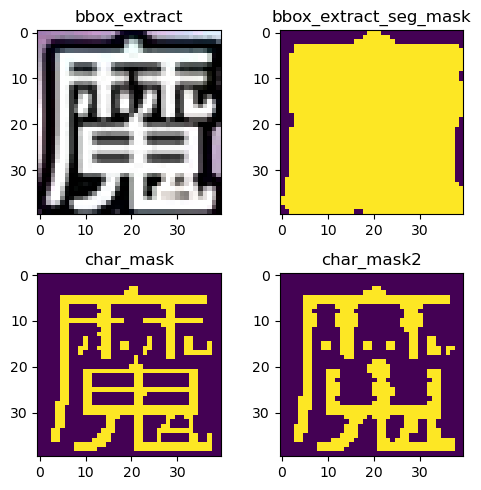

w, h = 38, 40


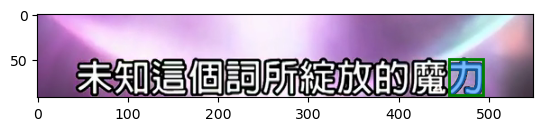

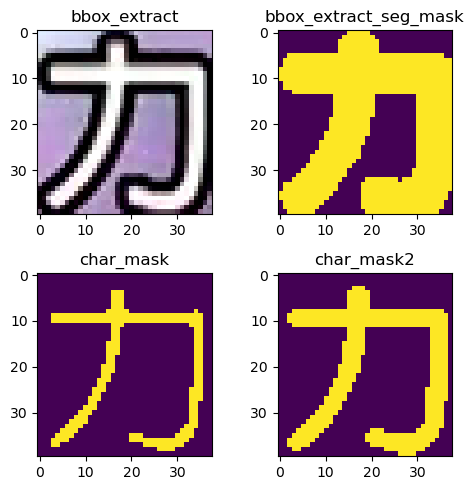

In [191]:
potential_masks = []

for mask in masks:
    seg_mask = mask['segmentation']
    bbox = mask['bbox']
    x, y, w, h = bbox
    if 34 < w < 42 and 36 < h < 44:
        potential_masks.append(mask)

# sort by x coordinate of bbox. At least good for single rows of characters
potential_masks.sort(key=lambda mask: mask['bbox'][0])

for mask in potential_masks:
    seg_mask = mask['segmentation']
    bbox = mask['bbox']
    x, y, w, h = bbox
    if not (34 < w < 42 and 36 < h < 44):
        continue

    print(f'w, h = {w}, {h}')

    fig, ax = plt.subplots(1, 1)
    plt.imshow(frame)
    show_mask(mask['segmentation'], ax=ax)
    show_box(mask['bbox'], ax=ax)

    bbox_extract_seg_mask = seg_mask[y:y+h, x:x+w]
    bbox_extract = frame[y:y+h, x:x+w]

    char_mask = mask_to_char(frame, mask, 230)
    char_mask2 = grow_thin_binary(char_mask)


    # do the above four plots in a 2x2 grid
    fig, ax = plt.subplots(2, 2, figsize=(4,4))

    _ = ax[0, 0].imshow(bbox_extract)
    _ = ax[0, 0].set_title('bbox_extract')

    _ = ax[0, 1].imshow(bbox_extract_seg_mask)
    _ = ax[0, 1].set_title('bbox_extract_seg_mask')

    _ = ax[1, 0].imshow(char_mask)
    _ = ax[1, 0].set_title('char_mask')

    _ = ax[1, 1].imshow(char_mask2)
    _ = ax[1, 1].set_title('char_mask2')

    plt.tight_layout()
    plt.show()



<Figure size 640x480 with 0 Axes>

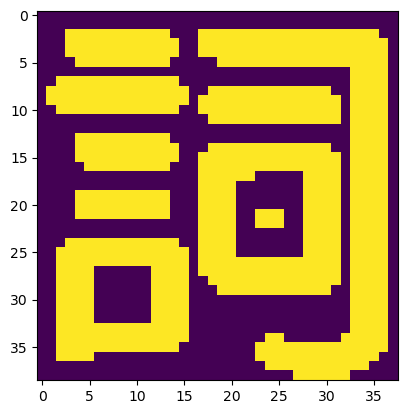

In [165]:
char_mask2 = grow_thin_binary(char_mask)
plt.figure()
plt.imshow(char_mask2)

In [108]:
# convert bbox_extract to grayscale
bbox_extract_gray = cv2.cvtColor(bbox_extract, cv2.COLOR_RGB2GRAY)

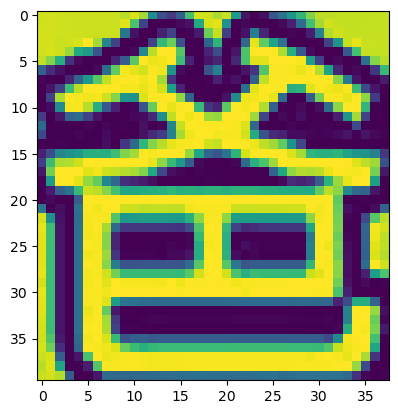

In [109]:
plt.imshow(bbox_extract_gray)

(array([328.,  43.,  15.,  14.,  11.,  27.,   5.,   5.,   4.,  16.,   7.,
          2.,   7.,   0.,  11.,  11.,   3.,   3.,   1.,   7.,   6.,   5.,
          2.,   5.,   4.,   5.,   9.,   4.,   4.,  27.,   8.,   6.,   9.,
          6.,  29.,  13.,  11.,  20.,   7.,   2.,   0.,   2.,   1.,   6.,
          1.,   4.,   1.,   4.,   1.,   2.,   2.,   6.,   4.,   4.,   9.,
          6.,   7.,   1.,   6.,   1.,   5.,   7.,  16.,  10.,   8.,   9.,
          4.,  19.,  21.,  15.,   5.,   8.,   3.,   4.,   7.,   3.,   6.,
          5.,   4.,   4.,   3.,  11.,   6.,   6.,   6.,   7.,   9.,   8.,
          6.,  14.,  23.,  24.,  47.,  19.,  14.,  15.,  19.,  15.,  68.,
        267.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 

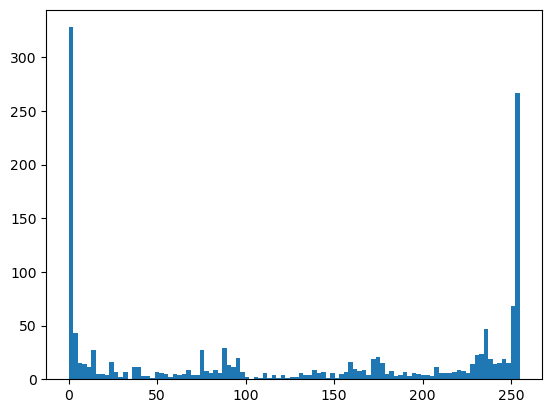

In [110]:
plt.hist(bbox_extract_gray.flatten(), bins=100)

In [115]:
w, h

(38, 40)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

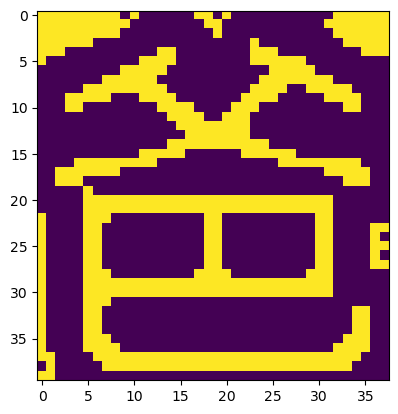

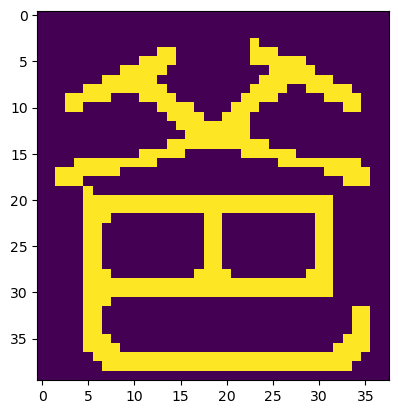

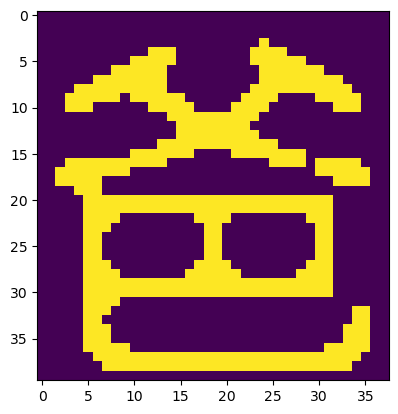

In [114]:
a = bbox_extract_gray > 230
plt.figure()
plt.imshow(a)

b = bbox_extract_seg_mask
plt.figure()
plt.imshow(a & b)

c = grow_thin_binary(a & b)
plt.figure()
plt.imshow(c)


<Figure size 2000x2000 with 0 Axes>

(-0.5, 1279.5, 719.5, -0.5)

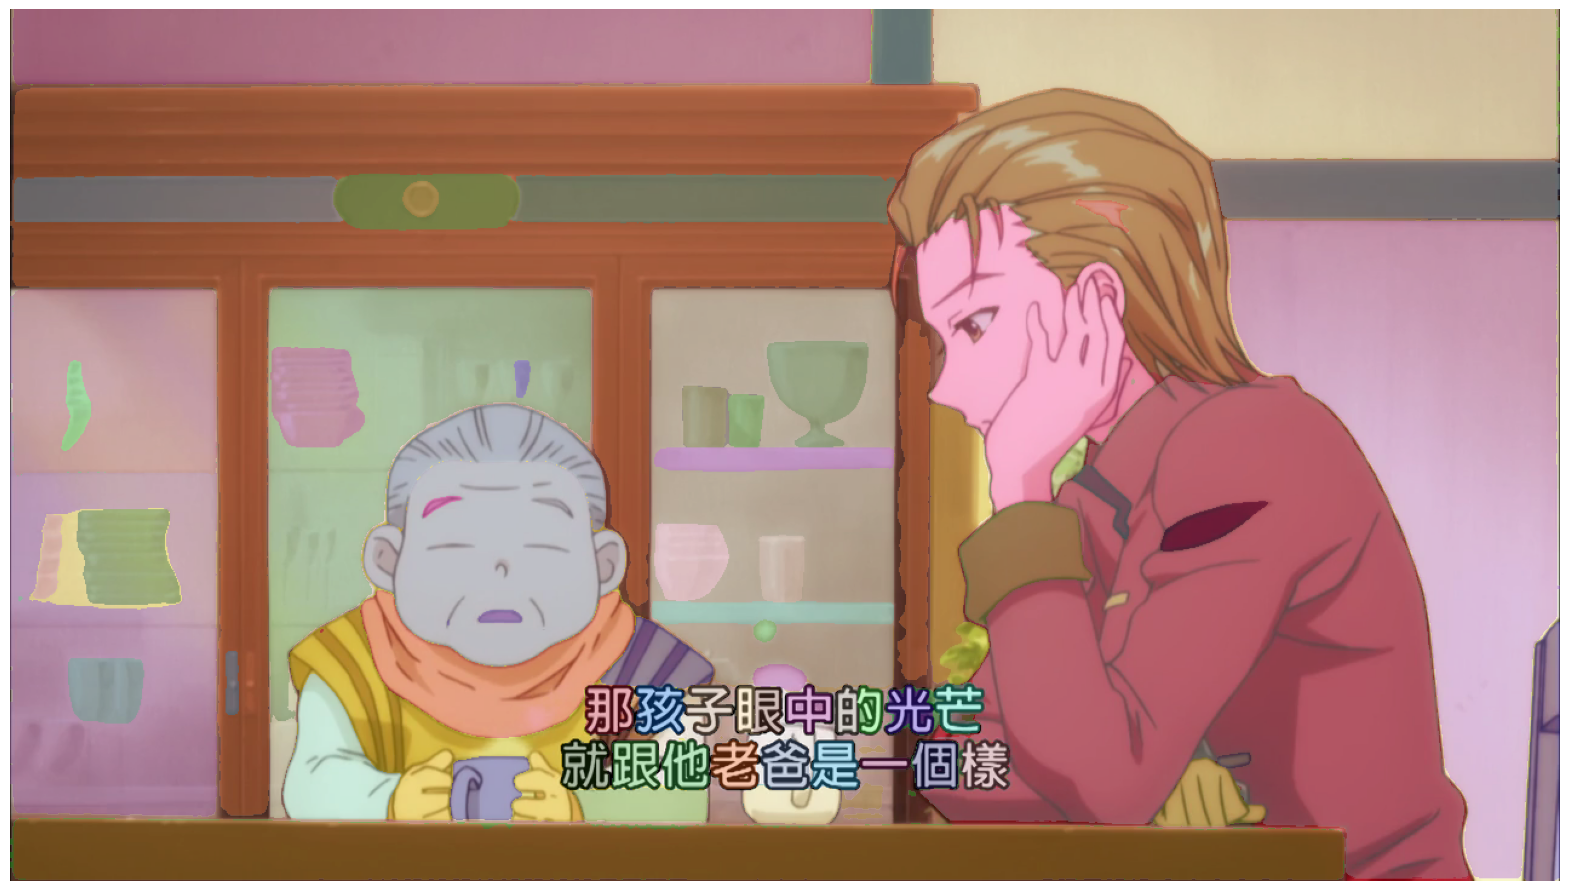

In [50]:
plt.figure(figsize=(20,20))
plt.imshow(frame)
show_anns(masks)
plt.axis('off')
plt.show() 

In [51]:
len(masks)

91

True

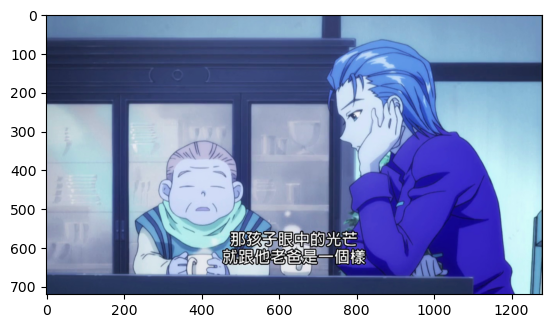

In [43]:
# check that frame is rgb format and not bgr
import cv2
cv2.imwrite('test.jpg', frame)
plt.imshow(cv2.imread('test.jpg'))



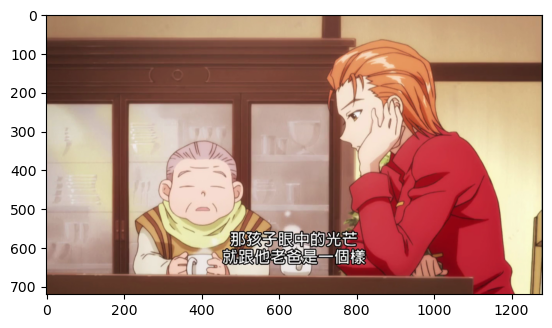

In [44]:
# convert to bgr
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.imshow(frame)